In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image, ImageChops
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow import metrics
from tensorflow.math import confusion_matrix

In [2]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


**MNIST DATASET**

In [3]:
(X_train, Y_train), (X_test,y_test) = mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, Y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60k
Test data = 10k

Image dimension = 28x28
Greyscale Image = 1 channel

In [6]:
print(X_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

In [7]:
print(X_train[100].shape)

(28, 28)


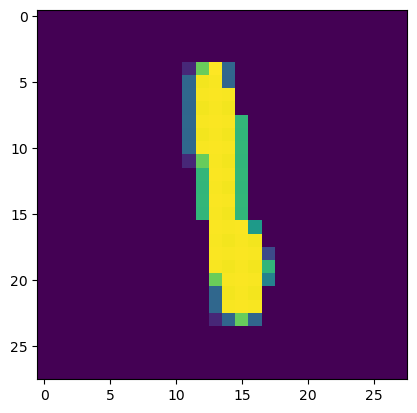

1


In [8]:
plt.imshow(X_train[200])
plt.show()
print(Y_train[200])

In [9]:
#unique labels in y_train
print(np.unique(Y_train))

#unique labels in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Converting 0-255 to 0-1**

In [10]:
#Scaling the values

X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
print(X_train[100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building Neural Network (wont use CNN)**

In [12]:
#setting up layers for the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),      #loadin all values as single line (1D)
    keras.layers.Dense(50, activation='relu'),      #50-no of neurons rectified linear , all layers
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),   #output, 10 - no of labels,ie 0-9 here
])

In [13]:
#compiling the neural network

model.compile(optimizer='adam',                     #determine the most optimal parameter
              loss = 'sparse_categorical_crossentropy', #because, simple encoder
              metrics=['accuracy'])                 #optimizer, loss, metric

In [14]:
#training the neural network

model.fit(X_train, Y_train, epochs=10)             #epochs = how many times it should go through nn

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1379 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1020 - accuracy: 0.9698
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0833 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0692 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0593 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0404 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

**Accuracy > 99 on training**

**Accuracy on test data >97**

In [15]:
loss, accuracy = model.evaluate(X_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9702
0.9702000021934509


In [16]:
print(X_test.shape)

(10000, 28, 28)


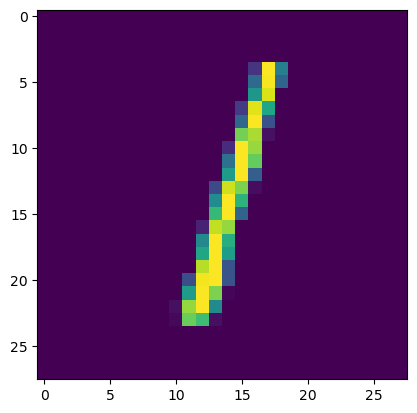

In [17]:
# first data point in X_test
plt.imshow(X_test[2])
plt.show()

In [18]:
print(y_test[2])

1


In [19]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 890us/step


In [20]:
print(y_pred.shape)

(10000, 10)


In [21]:
print(y_pred[2])                    #it will tell the probability of each value

[0.00230478 0.99985707 0.40052834 0.00205352 0.10462911 0.17231362
 0.18637697 0.7375839  0.42895105 0.01839005]


model.predict() gives the prediction probability of each class for that particular data point

In [22]:
#converting prediction probabilities to class label

label_for_first_image = np.argmax(y_pred[2])
print(label_for_first_image)

1


In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [24]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 962    0    1    2    2    7    0    3    2    1]
 [   0 1128    2    0    0    3    1    0    1    0]
 [   5    2 1003    5    6    2    1    4    4    0]
 [   0    1    5  966    0   24    0    6    3    5]
 [   2    1    5    0  958    2    4    2    1    7]
 [   1    0    0    8    1  876    1    0    3    2]
 [   7    2    6    1    5   18  918    0    1    0]
 [   0    6   16    1    1    0    0  996    2    6]
 [   2    0    5    9    3   10    1    3  936    5]
 [   0    4    0    6   24    9    0    9    2  955]], shape=(10, 10), dtype=int32)


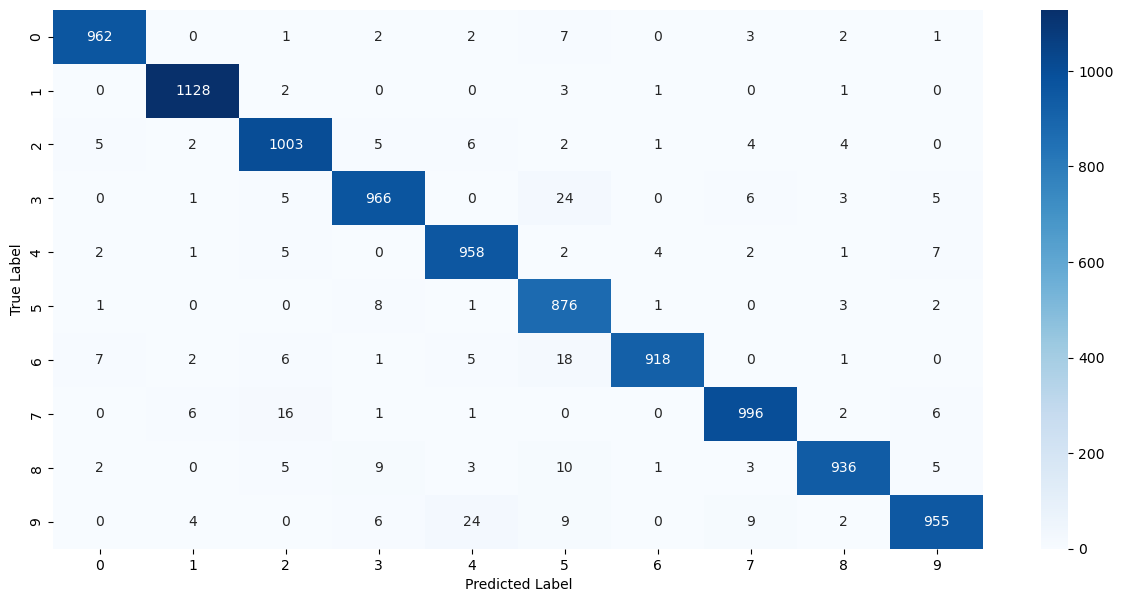

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues')          #fmt=d all values should be int
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Building a predictive system**

In [27]:
def prediction(input_image_path):
    fig = plt.figure(figsize=(10, 7)) 
    rows=2
    columns=2
    input_image = cv2.imread(input_image_path)
    fig.add_subplot(rows, columns, 1) 
    plt.imshow(input_image)
    plt.axis('off') 
    plt.title("Original") 
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
    grayscale = cv2.bitwise_not(grayscale)
    input_img_resize = cv2.resize(grayscale, (28,28))
    fig.add_subplot(rows, columns, 2) 
    plt.imshow(grayscale)
    plt.axis('off') 
    plt.title("Grayscale and resized") 
    input_img_resize = input_img_resize/255                     #Scaling the image
    fig.add_subplot(rows, columns, 3) 
    plt.imshow(input_img_resize)
    plt.axis('off') 
    plt.title("Scaled image")
    image_reshape = np.reshape(input_img_resize, [1,28,28])          #giving only 1 image to nn, need to mention
    inp_predict = model.predict(image_reshape)
    label = np.argmax(inp_predict)
    return label

1/1 [==============================] - 0s 15ms/step
3


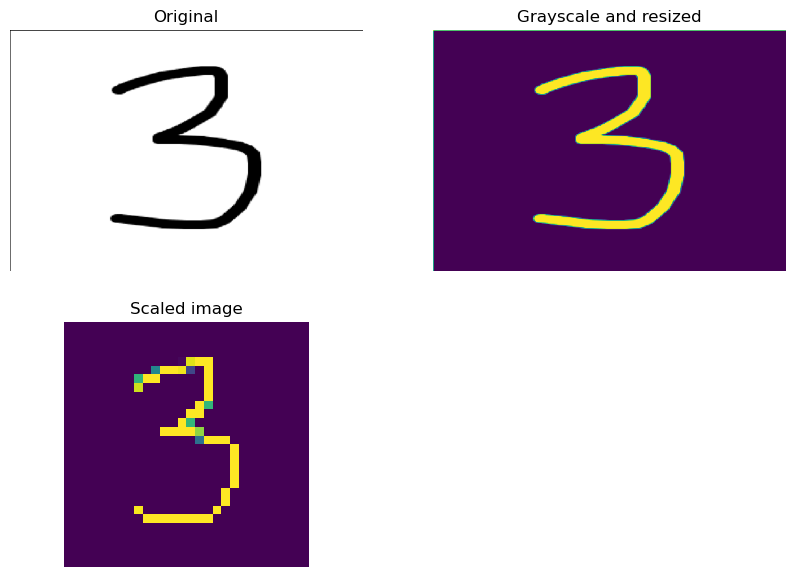

In [ ]:
print(prediction(r'5_h.jpeg'))